In [4]:
%load_ext autoreload
%autoreload 2


import os
import sys 
print(sys.executable)

os.chdir("/Users/niel.hu/research/TrainingDynamics")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/niel.hu/research/env/bin/python3.7


In [6]:
'''try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle'''
    
    
import pickle as pickle

    
import torchvision.transforms as transforms
from utils.mnist import IndexedMNIST as mnist
from utils.cifar import IndexedCifar10 as cifar10

import matplotlib.pyplot as plt
import numpy as np
import pdb
import torch

import seaborn as sns
import time
import pandas as pd


from IPython.display import clear_output

In [48]:

import pickle5 as pickle



directories = [
    "result-161770",
    "result-260083",
    "result-291436",
    "result-490074",
    "result-535876"
    ]



def load_blobs(files, blob_type="train"):
    start = time.time()
    blob_runs = []
    for count, file in enumerate(files):

        print ("Progress: {:0.2f} %, {} Seconds ".format((count + 1)/len(files) * 100, time.time() - start))
        clear_output(wait=True)
        with open(file + "/{}-log.txt.logger.blob.pickle".format(blob_type), 'rb') as handle:
            run = pickle.load(handle)
        blob_runs.append(run)
    return blob_runs


results = {}

for dname in directories:
    d =   "cifar-10-25randomlabel-standard/" + dname
    results[dname] = {"train": load_blobs([d]), "test":load_blobs([d], "valid")}


Progress: 100.00 %, 8.106231689453125e-06 Seconds 


In [8]:
results.keys()

dict_keys(['result-161770', 'result-260083', 'result-291436', 'result-490074', 'result-535876'])

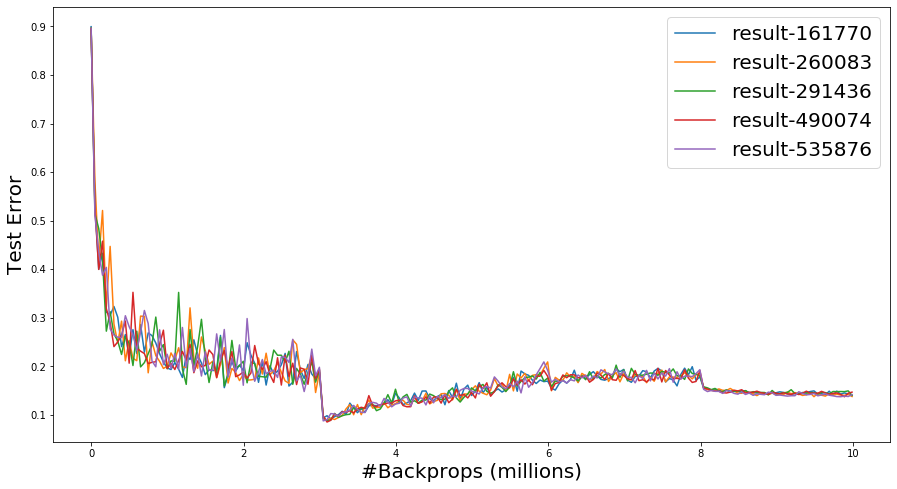

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))

for dname in directories:
    num_backprops = np.cumsum([0] + results[dname]['train'][0]['epoch_backprops'])
    test_error = 1 - np.array(results[dname]['test'][0]['epoch_pred1'])
    plt.plot(num_backprops / 1e+6, test_error)

ax.set_xlabel("#Backprops (millions)", size=20)
ax.set_ylabel("Test Error", size=20)
plt.legend(directories,  fontsize=20)


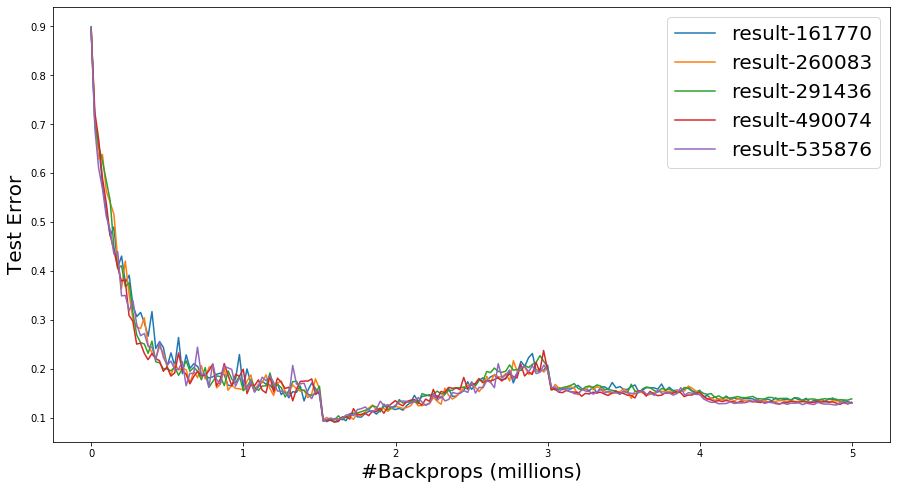

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))

for dname in directories:
    num_backprops = np.cumsum([0] + results[dname]['train'][0]['epoch_backprops'])
    test_error = 1 - np.array(results[dname]['test'][0]['epoch_pred1'])
    plt.plot(num_backprops / 1e+6, test_error)

ax.set_xlabel("#Backprops (millions)", size=20)
ax.set_ylabel("Test Error", size=20)
plt.legend(directories,  fontsize=20)


In [36]:
np.max([k[1] for k in results[dname]['train'][0]['examples'][0][10]])

13.979784

In [38]:

# cifar
pct0 = np.load("dataset_overrides/cifar10/0pct_random_label.npy")
pct25 = np.load("dataset_overrides/cifar10/25pct_random_label.npy")
noise = set(np.array(range(len(pct0)))[pct0 != pct25])



def merge(data, multipliers=None):
    ret = []
    for epoch_idx, epoch in enumerate(data['examples']):
        epoch_buf = []
        
        for iteration_idx, iteration in enumerate(epoch):
            
            try:
                buf = data['multipliers'][epoch_idx][iteration_idx]
            except:
                buf = [1] * len(iteration)
            
            epoch_buf += [list(zip([i[0] for i in iteration], [i[1] for i in iteration],  buf))]
        
        ret += [epoch_buf]
    return ret



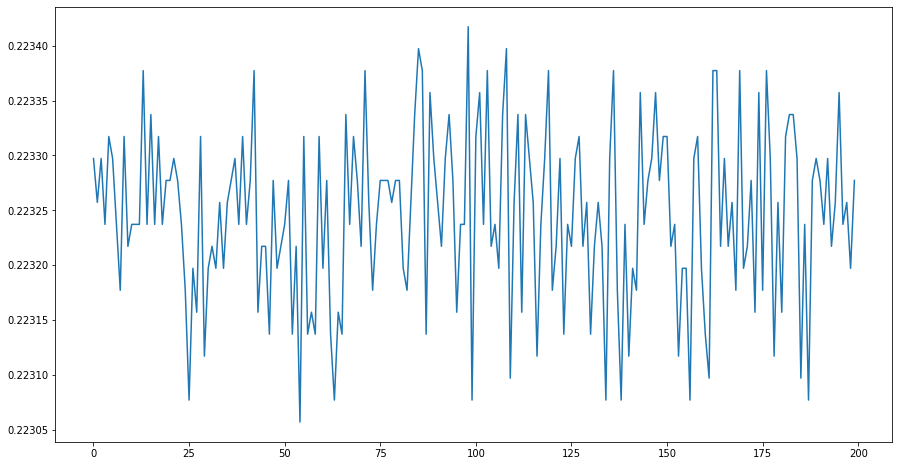

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))

total = list(merge(results['result-535876']['train'][0]))
to_plot = [[np.sum([example[2] for example in iteration if example[0] in noise]) / np.sum([example[2] for example in iteration]) for iteration in epoch] for epoch in total]
    
plt.plot([np.mean(s) for s in to_plot])
    

In [43]:
results[dname]['train'][0].keys()

dict_keys(['backprops', 'lr', 'epoch_backprops', 'epoch_pred1', 'correct_pred', 'examples', 'train_loss', 'multipliers', 'train_pred1'])